# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd
# Import libraries for data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# Import libraries for Statististical Analysis
import scipy.stats as stats


## Reading the Data into a DataFrame

In [ ]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
enews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sample_Data/abtest.csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# View the first and last few rows of the dataset

print('First few rows of data : \n',enews_df.head(),'\n')
print('Last few rows of data : \n',enews_df.tail())


First few rows of data : 
    user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish   

Last few rows of data : 
     user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   5464

In [ ]:
# Check the shape of the dataset (number of rows and columns in the data)

print(enews_df.shape)
print(f'There are {enews_df.shape[0]} rows and {enews_df.shape[1]} columns in the dataset')

(100, 6)
There are 100 rows and 6 columns in the dataset


In [ ]:
# Get the Statistical summary for all the variables

summary_all = enews_df.describe(include = 'all').T
print('Statistical summary for all variables: \n',summary_all,'\n')

# Get the Statistical summary for the numerical variables

summary_numerical = enews_df.describe(include = np.number).T
print('Statistical summary for the numerical variables: \n',summary_numerical,'\n')

# Get the Statistical summary for the categorical variables

summary_categorical = enews_df.describe(include = object).T
print('Statistical summary for the categorical variables: \n',summary_categorical,'\n')


Statistical summary for all variables: 
                         count unique      top freq      mean        std  \
user_id                 100.0    NaN      NaN  NaN  546517.0  52.295779   
group                     100      2  control   50       NaN        NaN   
landing_page              100      2      old   50       NaN        NaN   
time_spent_on_the_page  100.0    NaN      NaN  NaN    5.3778   2.378166   
converted                 100      2      yes   54       NaN        NaN   
language_preferred        100      3  Spanish   34       NaN        NaN   

                             min        25%       50%        75%       max  
user_id                 546443.0  546467.75  546492.5  546567.25  546592.0  
group                        NaN        NaN       NaN        NaN       NaN  
landing_page                 NaN        NaN       NaN        NaN       NaN  
time_spent_on_the_page      0.19       3.88     5.415     7.0225     10.71  
converted                    NaN        NaN     

In [ ]:
# Check for the missing values

missing_values = enews_df.isnull().sum()

if missing_values.any():
  print("There are Missing Values\n")
  print(missing_values)
else:
  print("There are no Missing Values\n")
  print(missing_values)

There are no Missing Values

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


In [ ]:
# Check for the duplicates

duplicate_values = enews_df.duplicated().sum()
print(f'There are {duplicate_values} duplicate values in the dataset')


There are 0 duplicate values in the dataset


In [ ]:
# check for the data types of columns in the dataset
enews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Univariate Analysis

In [ ]:
# check unique values of userid
unique_userid_values = enews_df['user_id'].nunique()
print(f'There are {unique_userid_values} unique values in the user_id column')

There are 100 unique values in the user_id column


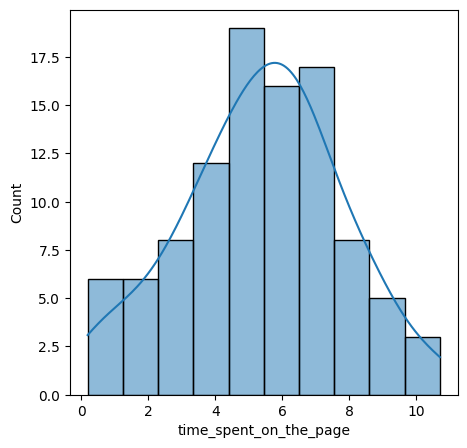

----------------------------------------------------------------------------------------------------------------------------------------------------------------


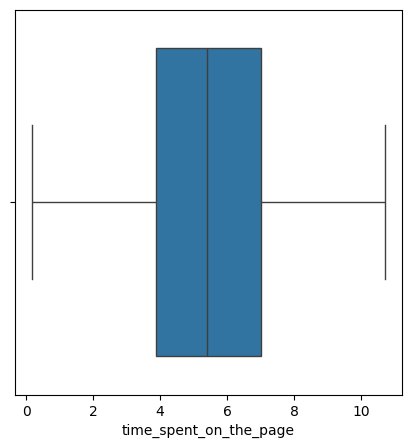

In [ ]:
# check the distribution for time spent on the page using Histogram chart
plt.figure(figsize=(5, 5))
sns.histplot(data = enews_df , x = 'time_spent_on_the_page',bins = 10, kde=True)
plt.show()
print('--------'*20)
# check for the outliers for time spent on the page using Boxplot
plt.figure(figsize=(5,5))
sns.boxplot(data = enews_df , x = 'time_spent_on_the_page')
plt.show()

**Observation :**


*   The time spent on the page seems to have close to normal distribution and boxplot shows that there are no outliers.




In [ ]:
# univariant analysis for group
# check to the count the frequency of unique values in group column
group_counts = enews_df['group'].value_counts()
print(group_counts)

group
control      50
treatment    50
Name: count, dtype: int64


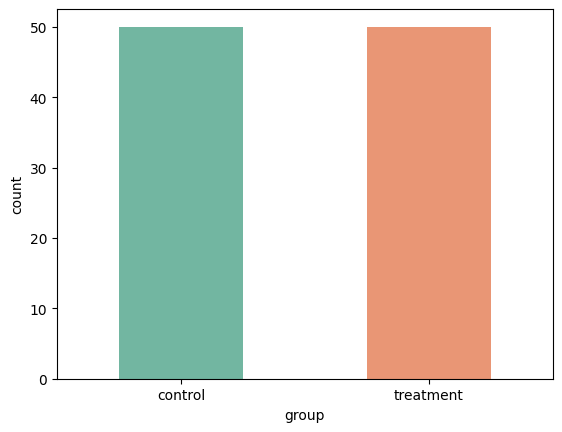

In [ ]:
# countplot for visualizing the group categorical data
sns.countplot(data = enews_df , x = 'group',palette= 'Set2',hue = 'group',legend= False,dodge = False,width = 0.5)
plt.show()

**Observation :**
 Group has control category with 50 observations and treatment category with 50 observations.

In [ ]:
# univariant analysis for Landing page
# check the percentage of users using old and new landing page
landing_page_counts = enews_df['landing_page'].value_counts(normalize = True)*100
print(landing_page_counts)

landing_page
old    50.0
new    50.0
Name: proportion, dtype: float64


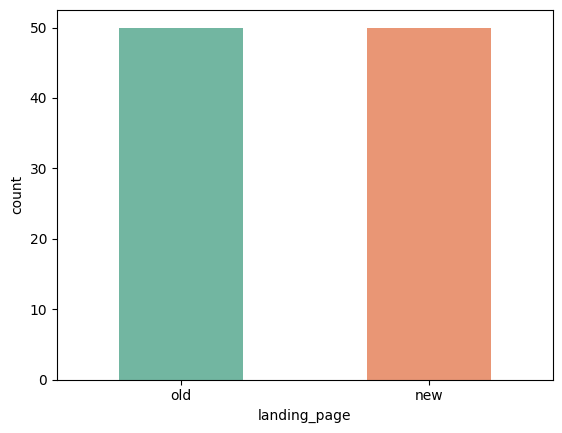

In [ ]:
# countplot for visualizing the landing page categorical data
sns.countplot(data = enews_df , x = 'landing_page',palette= 'Set2',hue = 'landing_page',legend= False,dodge = False,width = 0.5)
plt.show()

**Observation :**
 We see same as group the landing page category says 50% users view old landing page and 50% of users view new landing page.

In [ ]:
# univariant analysis for Converted users
# To Check the percentage of users in Converted column
Percentage_converted_counts = enews_df['converted'].value_counts(normalize = True)*100
print(Percentage_converted_counts)

converted
yes    54.0
no     46.0
Name: proportion, dtype: float64


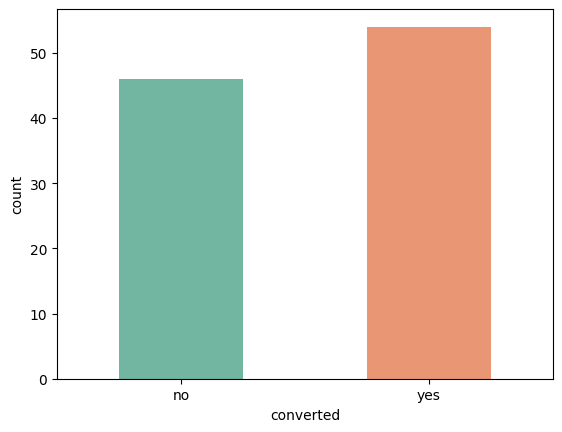

In [ ]:
# countplot for visualizing the Converted categorical data
sns.countplot(data = enews_df , x = 'converted',palette= 'Set2',hue = 'converted',legend= False,dodge = False,width = 0.5)
plt.show()

**Observation:**
We see 54% of users are converted and 46% of users are not converted.

In [ ]:
# univariant analysis for Language preferred
# check the Number of observations in each category
preferred_lang = enews_df['language_preferred'].value_counts()
print(preferred_lang)

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


In [ ]:
#Percentage of observations in language preferred category
Percentage_preferred_lang = enews_df['language_preferred'].value_counts(normalize = True)*100
print(Percentage_preferred_lang)

language_preferred
Spanish    34.0
French     34.0
English    32.0
Name: proportion, dtype: float64


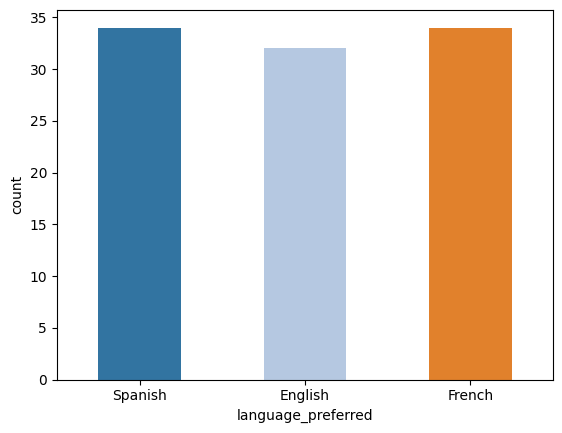

In [ ]:
# countplot for visualizing the observations of language preferred categorical data
sns.countplot(data = enews_df , x = 'language_preferred',palette= 'tab20',hue = 'language_preferred',legend = False, width = 0.5)
plt.show()

**Observation :**
We see there are 3 preferred languages , 34% of users preferred Spanish,32% of users preferred English , 34% of users preferred French.

### Bivariate Analysis

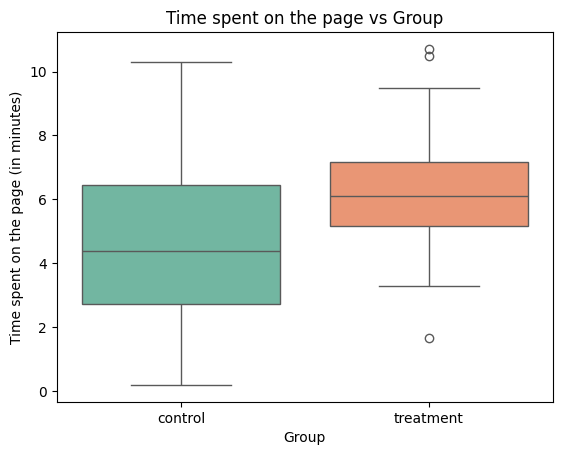


 group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64 

Average time spent on the page by Control group is 4.53 minutes
Average time spent on the page by Treatment group is 6.22 minutes


In [ ]:
# Boxplot to observe the relationship between Time spent on the page and Group

sns.boxplot(data = enews_df , x = 'group', y = 'time_spent_on_the_page',palette= 'Set2',hue = 'group',legend = False)
plt.title('Time spent on the page vs Group')
plt.xlabel('Group')
plt.ylabel('Time spent on the page (in minutes)')
plt.show()
# Calculate the average time spent on the page by Control group and Treatment group
average_time_spent_on_the_page = enews_df.groupby(enews_df['group'])['time_spent_on_the_page'].mean()
print('\n',average_time_spent_on_the_page,'\n')
print(f'Average time spent on the page by Control group is {round(average_time_spent_on_the_page.iloc[0],2)} minutes')
print(f'Average time spent on the page by Treatment group is {round(average_time_spent_on_the_page.iloc[1],2)} minutes')


**Observation :**
- We see that the average time spent on the page by treatment group is around 6.2 minutes where as average time spent on the page by control group is around 4.5 minutes.
- Also 25% of the control group users time spent on landing page is between 0-3 minutes where as 25% of the treatment group users time spent on landing page is between 2-5.2 minutes.

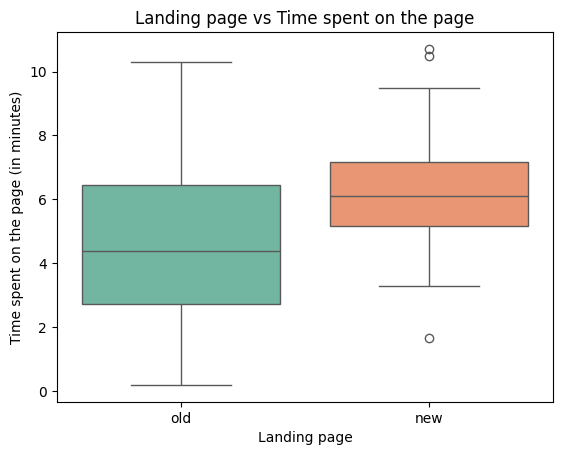


 landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64 

Average time spent on the page by new landing page is 6.22 minutes
Average time spent on the page by old landing page is 4.53 minutes


In [ ]:
# Landing page vs Time spent on the page
# Boxplot to observe the relationship between Landing page and Time spent on the page

sns.boxplot(data = enews_df , x = 'landing_page', y = 'time_spent_on_the_page',palette= 'Set2',hue = 'landing_page',legend = False)
plt.title('Landing page vs Time spent on the page')
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page (in minutes)')
plt.show()
# Calculate the average time spent on the page by Landing page
average_time_spent_on_page_by_landing_page = enews_df.groupby(enews_df['landing_page'])['time_spent_on_the_page'].mean()
print('\n',average_time_spent_on_page_by_landing_page,'\n')
print(f'Average time spent on the page by new landing page is {round(average_time_spent_on_page_by_landing_page.iloc[0],2)} minutes')
print(f'Average time spent on the page by old landing page is {round(average_time_spent_on_page_by_landing_page.iloc[1],2)} minutes')


**Observation :**
- We see that the average time spent by users on new landing page is around 6.2 minutes where as average time spent by users on new landing page is around 4.5 minutes.
-  25% of the users time spent on new landing page is between 2-5.2 minutes where as 25% of the  users time spent on old landing page is between 0-3 minutes.

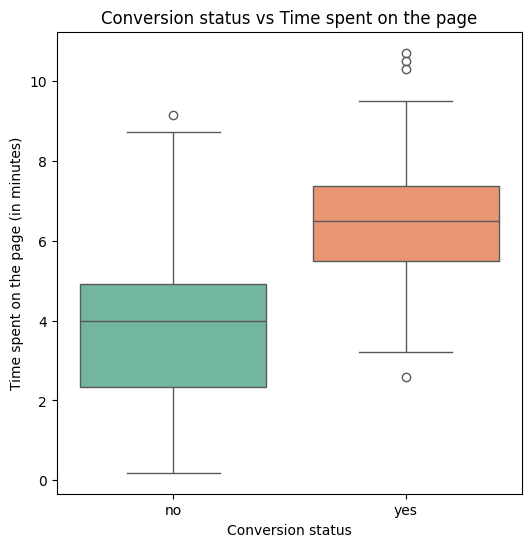


 converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64 

Average time spent on the page by no status is 3.92 minutes
Average time spent on the page by yes status is 6.62 minutes


In [ ]:
# Conversion status vs Time spent on the page
# Boxplot to observe the relationship between Conversion status and Time spent on the page
plt.figure(figsize=(6,6))
plt.title('Conversion status vs Time spent on the page')
sns.boxplot(data = enews_df , x = 'converted', y = 'time_spent_on_the_page',palette= 'Set2',hue = 'converted',legend = False)
plt.xlabel('Conversion status')
plt.ylabel('Time spent on the page (in minutes)')
plt.show()
# Calculate the average time spent on the page by converted
average_time_spent_on_page_by_converted = enews_df.groupby(enews_df['converted'])['time_spent_on_the_page'].mean()
print('\n',average_time_spent_on_page_by_converted,'\n')
# Get the index label names
conversion_index_labels = average_time_spent_on_page_by_converted.index.tolist()
# print the average time spent on the page for converted and non converted users
print(f'Average time spent on the page by {conversion_index_labels[0]} status is {round(average_time_spent_on_page_by_converted[conversion_index_labels[0]],2)} minutes')
print(f'Average time spent on the page by {conversion_index_labels[1]} status is {round(average_time_spent_on_page_by_converted[conversion_index_labels[1]],2)} minutes')


**Observation :**
- We see that the users who converted had spent more time on the page than the users who did not convert.
- The average time spent by those users who did not convert is approximately 3.92 minutes, whereas average time spent by those users who converted is approximately 6.62 minutes.

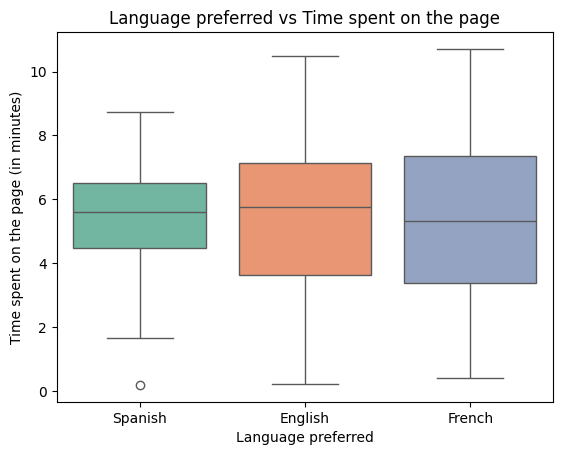


 language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64 

Average time spent on the page by English preferred users is 5.56 minutes
Average time spent on the page by French preferred users is 5.25 minutes
Average time spent on the page by Spanish preferred users is 5.33 minutes


In [ ]:
# Language preferred vs Time spent on the page
# Boxplot to observe the relationship between Language preferred and time spent on the page
#plt.figure(figsize=(9,9))
plt.title('Language preferred vs Time spent on the page')
sns.boxplot(data = enews_df , x = 'language_preferred', y = 'time_spent_on_the_page',palette= 'Set2',hue = 'language_preferred',legend = False)
plt.xlabel('Language preferred')
plt.ylabel('Time spent on the page (in minutes)')
plt.show()
# Calculate the average time spent on the page by language preferred
average_time_spent_on_page_by_language_preferred = enews_df.groupby(enews_df['language_preferred'])['time_spent_on_the_page'].mean()
print('\n',average_time_spent_on_page_by_language_preferred,'\n')

# Get the index label names
language_index_labels = average_time_spent_on_page_by_language_preferred.index.tolist()
# print the average time spent on the page for different language preferred users
print(f'Average time spent on the page by {language_index_labels[0]} preferred users is {round(average_time_spent_on_page_by_language_preferred[language_index_labels[0]],2)} minutes')
print(f'Average time spent on the page by {language_index_labels[1]} preferred users is {round(average_time_spent_on_page_by_language_preferred[language_index_labels[1]],2)} minutes')
print(f'Average time spent on the page by {language_index_labels[2]} preferred users is {round(average_time_spent_on_page_by_language_preferred[language_index_labels[2]],2)} minutes')

**Observation :**
- On average, users who selected English spent around 5.6 minutes,while French preferred users spent around 5.3 minutes,Spanish preferred spent around 5.3 minutes on the landing page.

group      converted
control    no           29
           yes          21
treatment  yes          33
           no           17
Name: count, dtype: int64


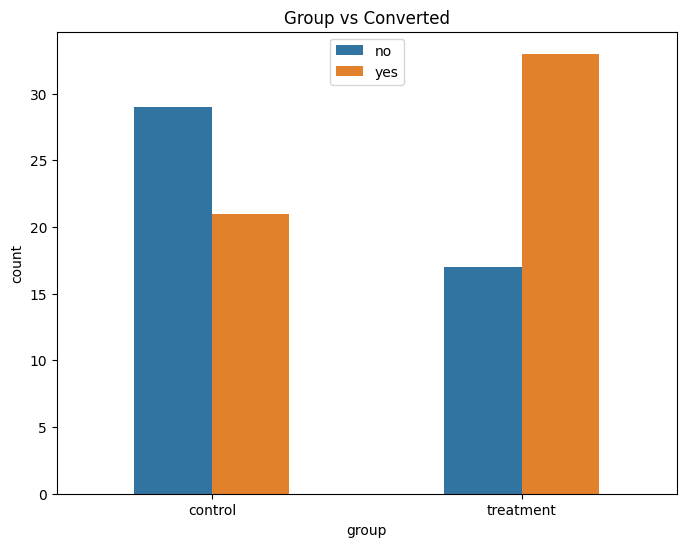

In [ ]:
# Explore relationship between group and converted
print(enews_df.groupby(enews_df['group'])['converted'].value_counts())
# countplot to visualize
plt.figure(figsize=(8,6))
sns.countplot(data = enews_df , x = 'group',hue = 'converted',palette= 'tab10',legend = True,dodge = True, width = 0.5)
plt.title('Group vs Converted')
plt.legend(loc='upper center')
plt.show()

**Observation :**
- We see the users who converted is higher in treatment group (33) when compared to number of users in control group (21).

group      language_preferred
control    French                17
           Spanish               17
           English               16
treatment  French                17
           Spanish               17
           English               16
Name: count, dtype: int64


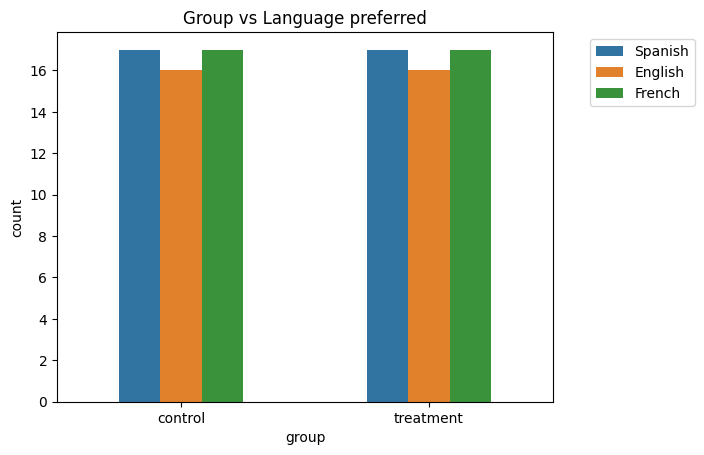

In [ ]:
# Explore relationship between group and language preferred
print(enews_df.groupby(enews_df['group'])['language_preferred'].value_counts())
# countplot to visualize

sns.countplot(data = enews_df , x = 'group',hue = 'language_preferred',palette= 'tab10',legend = True,dodge = True,width = 0.5)
plt.title('Group vs Language preferred')
plt.legend(loc='upper right',bbox_to_anchor = (1.3,1))
plt.show()

**Observation :**
- We see there is no significant difference between the language chosen to the group users belongs to.

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64


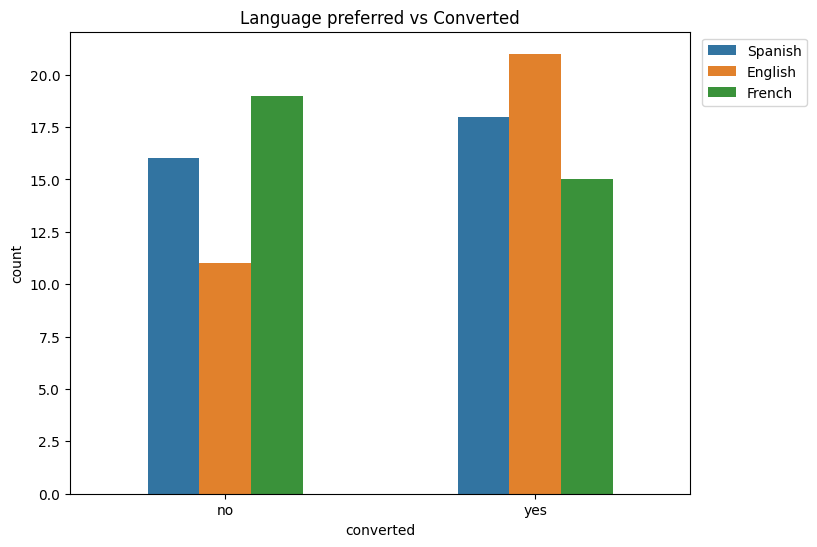

In [ ]:
# Explore relationship between converted and language preferred
print(enews_df.groupby(enews_df['language_preferred'])['converted'].value_counts())
# countplot to visualize
plt.figure(figsize=(8,6))
sns.countplot(data = enews_df , x = 'converted',hue = 'language_preferred',palette= 'tab10',legend = True,dodge = True,width = 0.5)
plt.title('Language preferred vs Converted')
plt.legend(loc='upper right',bbox_to_anchor = (1.2,1))
plt.show()

**Observation :**
- Users who preferred English have the higher convertion 21%,followed by Spanish with 18%,and French with 15%.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

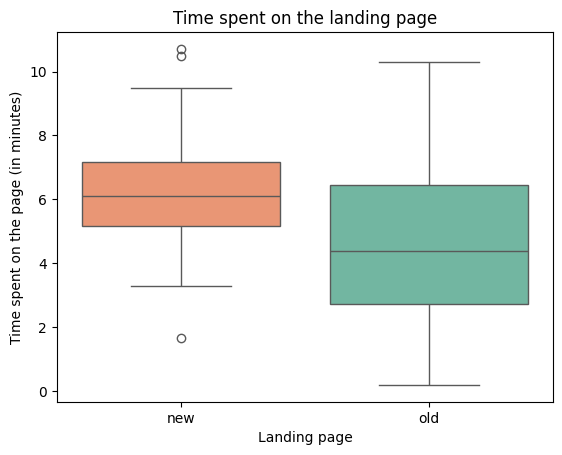

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


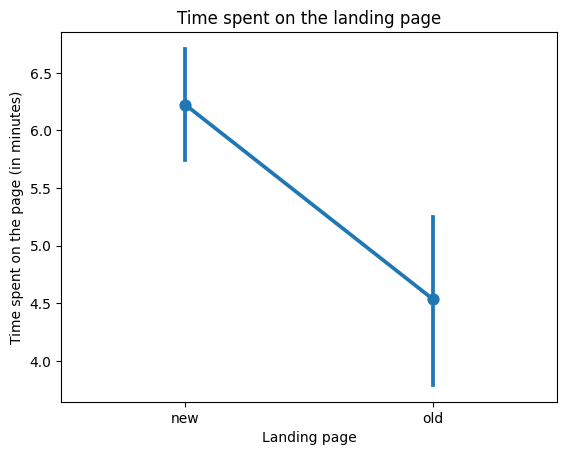

In [ ]:
# Visual analysis of the time spent on old landing page and time spent on new landing page
plt.style.use('default')
sns.boxplot(data = enews_df , x = 'landing_page', y = 'time_spent_on_the_page',palette= 'Set2',order = ['new','old'],hue = 'landing_page',legend = False)
plt.title('Time spent on the landing page')
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page (in minutes)')
plt.show()
print('--------'*30)
# pointplot to visualize the variability of time spent on the page across new landing page and existing(old) landing page
sns.pointplot(data = enews_df , x = 'landing_page', y = 'time_spent_on_the_page',order = ['new','old'])
plt.title('Time spent on the landing page')
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page (in minutes)')
plt.show()

**Observation :**
- Visual Analysis shows users spend more time on the new landing page than the existing landing page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$ and $\mu_2$ be the mean time spent by users on new and old page respectively.

$H_0:$ The null hypothesis is that the mean time spent by the users on the new landing page is equal to the time spent by the users on the old landing page.This is stated
as

>$H_0:\mu_1 = \mu_2$

$H_a:$ The alternative hypothesis is that the mean time spent by the users on the new landing page is greater than the mean time spent by the users on the old landing page.This is stated
as

>$H_a:\mu_1 > \mu_2$





### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown.Based on this information,the two sample independent t-test will be appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select  $\alpha$ = 0.05 .

### Step 4: Collect and prepare data

In [ ]:
# Get the data for the time spent on new landing page
time_spent_on_new_landing_page = enews_df[enews_df['landing_page'] == 'new']['time_spent_on_the_page']
# Get the data for the time spent on old landing page
time_spent_on_old_landing_page = enews_df[enews_df['landing_page'] == 'old']['time_spent_on_the_page']
# calculate the sample standard deviation of the time spent on new landing page
print('The sample standard deviation of time spent on the new landing page is :',round(time_spent_on_new_landing_page.std(),2))
# calculate the standard deviation of the time spent on new landing page
print('The sample standard deviation of time spent on the old landing page is :',round(time_spent_on_old_landing_page.std(),2))

The sample standard deviation of time spent on the new landing page is : 1.82
The sample standard deviation of time spent on the old landing page is : 2.58


**Observation :**
- We can conclude that standard deviation between the time spent on the new landing page and old landing page are not equal.

### Step 5: Calculate the p-value

In [ ]:
# Import the ttest function
from scipy.stats import ttest_ind
# Calculate the t-statistic and p-value
t_statistic, p_value = ttest_ind(time_spent_on_new_landing_page,time_spent_on_old_landing_page,equal_var = False,alternative = 'greater')
print('The P-value is ',p_value)

The P-value is  0.0001392381225166549


**Observation :**
The p-value of this sample t-test is 0.000139

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
  print(f'As the p-value is {p_value} is less than the level of significance, we reject the null hypothesis')
else:
  print(f'As the p-value is {p_value} is greater than level of significance, we fail to reject the null hypothesis')

As the p-value is 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis


**Observation :**
As the p-value is 0.0001392381225166549 is less than the level of significance (0.05),we reject the null hypothesis.

### Step 7:  Draw inference

Since the p-value is less than the 5% significance level,we reject the null hypothesis.Hence we have enough statistical evidence that the mean time spent by the users on new landing page is greater than the mean time spent by the users on old(existing) landing page.





**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

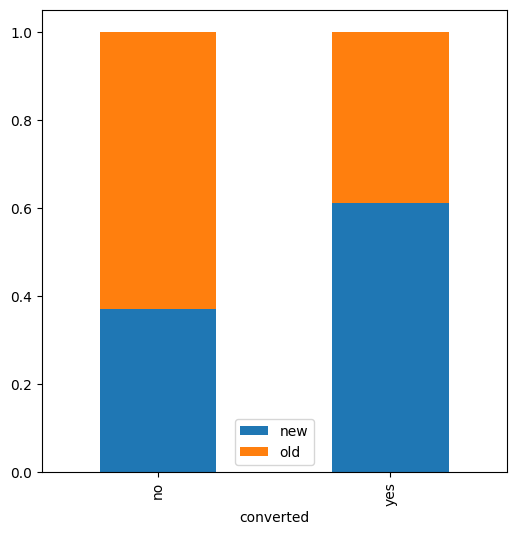

In [ ]:
# Visual analysis to understand the relationship between the users converted to new landing page to the users on the old page by using bar chart

pd.crosstab(enews_df['converted'],enews_df['landing_page'],normalize= 'index').plot(kind = 'bar',figsize=(6,6),stacked = True)
plt.legend()
plt.show()


**Observation :**
The visual analysis says that the conversion rate of users visited the new landing page is greater.

### Step 1 : Define the null and alternate hypotheses

Let $p_1$ and $p_2$ be the conversion proportion rate for new and old page respectively.

$H_0:$ The null hypothesis is that the users conversion rate for the new landing page is equal to the users conversion rate for the old landing page.This is stated
as

>$H_0:p_1 = p_2$

$H_a:$ The alternative hypothesis is that the users conversion rate for the new landing page is greater than the users conversion rate for the old landing page.This is stated
as

>$H_a:p_1 > p_2$


### Step 2 : Select appropriate test

This is one-tailed test concerning two population proportions from two independent populations.Hence two sample proportion z-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select  $\alpha$ = 0.05 .

### Step 4: Collect and prepare data

In [ ]:
# Calculate the number of converted users in the treament group
converted_users_treatment_group = enews_df[enews_df['group'] == 'treatment']['converted'].value_counts()['yes']
# Calculate the number of converted users in the control group
converted_users_control_group = enews_df[enews_df['group'] == 'control']['converted'].value_counts()['yes']

print('The number of converted users in the treatment group is {0} and the control group is {1} respectively.'.format(converted_users_treatment_group,converted_users_control_group))

# calculate the number of users in the treatment group
total_users_treatment_group = enews_df.group.value_counts()['treatment']
# calculate the number of users in the control group
total_users_control_group = enews_df.group.value_counts()['control']
print('The number of users in the treatment group is {0} and the control group is {1} respectively'.format(total_users_treatment_group,total_users_control_group))


The number of converted users in the treatment group is 33 and the control group is 21 respectively.
The number of users in the treatment group is 50 and the control group is 50 respectively


### Step 5: Calculate the p-value

In [ ]:
# Import the proportions z-test function
from statsmodels.stats.proportion import proportions_ztest
# calculate the p_value
test_stat , p_value = proportions_ztest([converted_users_treatment_group,converted_users_control_group],[total_users_treatment_group,total_users_control_group],alternative = 'larger')
print('The p-value is ',p_value)

The p-value is  0.008026308204056278


**Observation :**
The p-value for this two sample proportion z-test is 0.0080

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
  print(f'As the p-value is {p_value} is less than the level of significance, we reject the null hypothesis')
else:
  print(f'As the p-value is {p_value} is greater than level of significance, we fail to reject the null hypothesis')

As the p-value is 0.008026308204056278 is less than the level of significance, we reject the null hypothesis


**Observation :**
As the p-value is 0.0001392381225166549 is less than the level of significance (0.05),we Reject the null hypothesis.

### Step 7:  Draw inference

Since the p-value is less than the 5% significance level,we reject the null hypothesis.Hence we have enough statistical evidence that the users conversion rate for the new landing page is greater than the users conversion rate for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

###Perform Visual Analysis

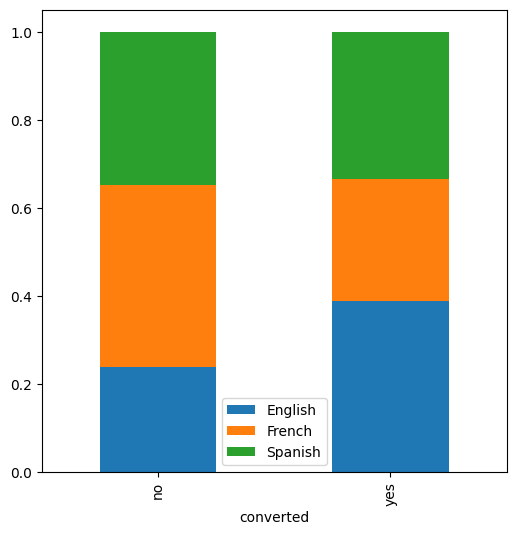

In [ ]:
# Visual analysis to understand the conversion has any dependency with the preferred language using bar chart

pd.crosstab(enews_df['converted'],enews_df['language_preferred'],normalize= 'index').plot(kind = 'bar',figsize=(6,6),stacked = True)
plt.legend()
plt.show()


**Observation :**
- Visual analysis says the users who opt for English has higher conversion rate.

###Step 1 : Define the null and alternate hypotheses


>$H_0:$ The user converted status is independent of the preferred language.

>$H_a:$ The user converted status is not independent of the preferred language.

###Step 2 : Select appropriate test

This is a problem of the Chi-square test of independence, concerning two categorical variables - converted status and preferred language.

###Step 3: Decide the significance level

As given in the problem statement, we select  α  = 0.05 .

###Step 4: Collect and prepare data

In [ ]:
# Create the contingency table for the distribution of converted status and language preferred
contingency_table = pd.crosstab(enews_df['converted'],enews_df['language_preferred'])
print(contingency_table)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


###Step 5: Calculate the p-value

In [ ]:
# Import the chi2_contingency function
from scipy.stats import chi2_contingency
# Calculate the p_value
chi2_stat , p_value , dof , expected_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p_value is ',p_value)

The p_value is  0.21298887487543447


###Step 6: Compare the p-value with  α

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
  print(f'As the p-value is {p_value} is less than the level of significance, we reject the null hypothesis')
else:
  print(f'As the p-value is {p_value} is greater than level of significance, we fail to reject the null hypothesis')

As the p-value is 0.21298887487543447 is greater than level of significance, we fail to reject the null hypothesis


**Observation :**
As the p-value is 0.212 which is greater than the level of significance (0.05) ,we fail to reject the null hypothesis.

###Step 7: Draw inference

Since p-value is greater than the 5% significance level, we fail to reject the null hypothesis.Therefore we have do not have enough statistical evidence to say that the converted status is not independent of the preferred language.(i.e., converted status depends on the preferred language)

## 4. Is the time spent on the new page same for the different language users?

###Perform Visual Analysis

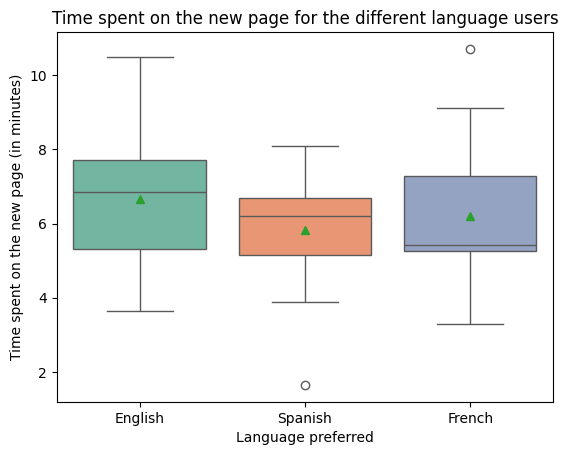

In [ ]:
# Create a new dataframe which includes only new page
new_page_df = enews_df[enews_df['landing_page'] == 'new']
# Visual analysis to understand time spent on the new page for the different language users using box plot
sns.boxplot(data = new_page_df , x = 'language_preferred', y = 'time_spent_on_the_page',palette= 'Set2',hue = 'language_preferred',legend = False,showmeans = True)
plt.title('Time spent on the new page for the different language users')
plt.xlabel('Language preferred')
plt.ylabel('Time spent on the new page (in minutes)')
plt.show()

**Observation:**

*   The average time spent (green triangle) reflects comparable pattern, suggesting a consistent level of engagement regardless of language preference.
*   English preferred users exhibit slightly higher with a wider IQR compared to Spanish and French users.
*  The new landing page doesnot drastically vary based on the language preferences.

###Step 1 : Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of English,Spanish and French users respectively.

We will test the null hypothesis

$H_0$ : The mean times spent on the new page by English,Spanish and French users are equal.
>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternate hypothesis

>$H_a$ : Atleast one of the mean times spent by English,Spanish and French users are not equal.

###Step 2 : Select appropriate test

This is a problem, concerning three population means.One-way ANOVA could be the appropriate test here provided normality and equality of variances assumption are verified.

Now, the normality and equality of variances assumptions need to be checked.


*   For testing of normality,Shapiro-Wilk's test is applied to the response varible.
*   For testing of variance,Levene test is applied to the response variable.



####Shapiro-Wilk's test

We will test the null hypothesis
>$H_0$ : The time spent on new landing page follows a normal distribution.

against the alternate hypothesis

>$H_a$ : The time spent on new landing page does not follow a normal distribution.

In [ ]:
# Assumption : Normality
# Import shapiro function
from scipy.stats import shapiro
# Calculate the p_value
statistic , p_value = shapiro(new_page_df['time_spent_on_the_page'])
print('The p-value is ',p_value)


The p-value is  0.8040040364746845


*Observation  :*

Since p-value of the test is greater than 5% significance level,we fail to reject the null hypothesis that the response follows a normal distribution.

####Levene's test

We will test the null hypothesis
>$H_0$ : All the population variances are equal.

against the alternate hypothesis

>$H_a$ : Atleast one of the variance is different from the rest.

In [ ]:
#Assumption : Homogeneity of variances
# Import levene function
from scipy.stats import levene
statistic_en,p_value_en2 = levene(new_page_df[new_page_df['language_preferred']=='English']['time_spent_on_the_page'],
                                  new_page_df[new_page_df['language_preferred']=='Spanish']['time_spent_on_the_page'],
                                  new_page_df[new_page_df['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is ',p_value_en2)

The p-value is  0.46711357711340173


*Observation  :*

Since p-value of the test is greater than 5% significance level,we fail to reject the null hypothesis of homogeneity of variances.

The below assumptions confirm that the criteria for applying statistical tests are satisfied.
   - Normality Assumption : The Shapiro-Wilk's test verified that the population follows a normal distribution.
   - Samples are independent : As provided,the samples are independent and collected randomly
   - Equality of population variance : The Levene's test verified the homogenity of variances.

###Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05 .

###Step 4: Collect and prepare data

In [ ]:
# get the time spent on the page for different language preferred
time_spent_on_new_page_english = new_page_df.loc[new_page_df['language_preferred'] == 'English','time_spent_on_the_page']
time_spent_on_new_page_spanish = new_page_df.loc[new_page_df['language_preferred'] == 'Spanish','time_spent_on_the_page']
time_spent_on_new_page_french = new_page_df.loc[new_page_df['language_preferred'] == 'French','time_spent_on_the_page']
# print the time spent on the page for different language preferred
print('The Average time spent on the new page by English users is ',time_spent_on_new_page_english.mean())
print('The Average time spent on the new page by Spanish users is ',time_spent_on_new_page_spanish.mean())
print('The Average time spent on the new page by French users is ',time_spent_on_new_page_french.mean())

The Average time spent on the new page by English users is  6.66375
The Average time spent on the new page by Spanish users is  5.835294117647059
The Average time spent on the new page by French users is  6.196470588235294


###Step 5: Calculate the p-value

In [ ]:
#Import the f_oneway function
from scipy.stats import f_oneway
#Calculate p_value
f_statistic , p_value = f_oneway(time_spent_on_new_page_english,time_spent_on_new_page_spanish,time_spent_on_new_page_french)
print('The p-value is ',p_value)

The p-value is  0.43204138694325955


**Observation :**
The p-value for this ANOVA test is 0.43 which is greater than level of significance 0.05.


###Step 6: Compare the p-value with  α

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
  print(f'As the p-value is {p_value} is less than the level of significance, we reject the null hypothesis')
else:
  print(f'As the p-value is {p_value} is greater than level of significance, we fail to reject the null hypothesis')

As the p-value is 0.43204138694325955 is greater than level of significance, we fail to reject the null hypothesis


**Observation :**
As the p-value is 0.43 which is greater than the level of significance (0.05) ,we fail to reject the null hypothesis.

###Step 7: Draw inference

Since p-value is greater than the 5% significance level, we fail to reject the null hypothesis.Therefore we have do not have enough statistical evidence to say that atleast one mean times spent by English,Spanish and French users is different from the rest.

## Conclusion and Business Recommendations

**Conclusion :**


*   Users engage more with the new landing page when compared to the existing landing page, as reflected by the users in the treatment group spent around 6.5 minutes on average on the new landing page while control group spent around 4.5 minutes on average.
*   Conversion rates are not significantly impacted by user's preferred languages, demonstarting the new landing page is confirming its universal appeal.

*   Time spent on the new landing page remains consistent across different language options, indicating the content and outline are equally engaging for English, Spanish and French languages.


**Recommendations :**

*   As the news company's new landing page design improves both engagement and conversion rates, it is recommended to roll it out site-wide to gather more subscribers.
*  Although language preference don't directly impact conversion, overall user experience can be enhanced by launching language specific campaigns.

*  Analyse and fine-tune key elements of the landing page, such as Call-to-Action's, to further enhance their impact on driving conversions.

*   The news company could focus on consistently improving the content of the new landing page to maintain and further optimize its performance.

*  Continuously conduct A/B testing to track page performance and ensure sustained improvements over time.









___